<a href="https://colab.research.google.com/github/ReehanaDR/imagecompression/blob/main/imagecompression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Flow of autoencoder
Input image->Encoder->Compressed Representation->Decoder->Reconstruct Input Image

Import Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.datasets import mnist

Load the Dataset

In [2]:
(x_train, _), (x_test, _)= mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
#normalize the image data
x_train= x_train.astype("float32")/255
x_test= x_test.astype("float32")/255


In [4]:
#reshape the input data for the model
x_train= x_train.reshape(len(x_train), 28, 28, 1)
x_test= x_test.reshape(len(x_test), 28, 28, 1)
x_test.shape

(10000, 28, 28, 1)

Exploratory Data Analysis

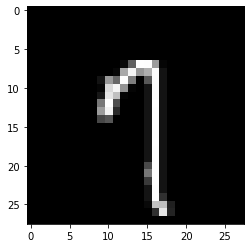

In [5]:
#randomly select the input image
index= np.random.randint(len(x_test))
#plot the image
plt.imshow(x_test[index].reshape(28,28))
plt.gray()

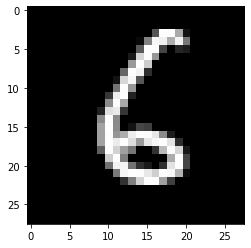

In [6]:
index= np.random.randint(len(x_test))
plt.imshow(x_test[index].reshape(28,28))
plt.gray()

Model Creation

In [7]:
model=Sequential([
                  #encoder network
                  Conv2D(32,3,activation="relu", padding="same", input_shape=(28,28,1)),
                  MaxPooling2D(2, padding="same"),
                  Conv2D(16,3,activation="relu", padding="same"),
                  MaxPooling2D(2, padding="same"),
                  
                  #decoder network
                  Conv2D(32,3,activation="relu", padding="same", input_shape=(28,28,1)),
                  UpSampling2D(2), 
                  Conv2D(32,3,activation="relu", padding="same", input_shape=(28,28,1)),
                  UpSampling2D(2), 
                  
                  #output layer
                  Conv2D(1,3,activation="sigmoid", padding="same")
])

model.compile(optimizer="adam", loss="binary_crossentropy")
model.summary()
                  
                  



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 16)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 32)          4640      
                                                                 
 up_sampling2d (UpSampling2D  (None, 14, 14, 32)       0

In [8]:
#train the model
model.fit(x_train, x_train, epochs=20, batch_size= 256, validation_data= (x_test, x_test))

Epoch 1/20
235/235 [==============================] - 135s 571ms/step - loss: 0.1642 - val_loss: 0.0857
Epoch 2/20
235/235 [==============================] - 139s 591ms/step - loss: 0.0822 - val_loss: 0.0782
Epoch 3/20
235/235 [==============================] - 147s 625ms/step - loss: 0.0772 - val_loss: 0.0752
Epoch 4/20
235/235 [==============================] - 143s 605ms/step - loss: 0.0744 - val_loss: 0.0728
Epoch 5/20
235/235 [==============================] - 164s 697ms/step - loss: 0.0729 - val_loss: 0.0716
Epoch 6/20
235/235 [==============================] - 139s 593ms/step - loss: 0.0719 - val_loss: 0.0708
Epoch 7/20
235/235 [==============================] - 133s 565ms/step - loss: 0.0711 - val_loss: 0.0702
Epoch 8/20
235/235 [==============================] - 133s 566ms/step - loss: 0.0705 - val_loss: 0.0696
Epoch 9/20
235/235 [==============================] - 134s 570ms/step - loss: 0.0700 - val_loss: 0.0692
Epoch 10/20
235/235 [==============================] - 133s 566m

In [9]:
#predict the results from model (get compressed images)
pred= model.predict(x_test)

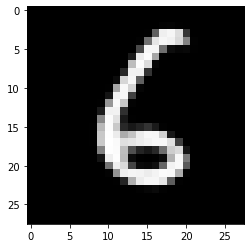

In [10]:
#visualize compressed image
#plot the image
plt.imshow(pred[index].reshape(28,28))
plt.gray()

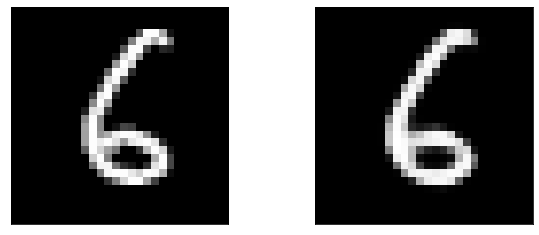

In [11]:
index = np.random.randint(len(x_test))
plt.figure(figsize= (10,4))
#display original image
ax= plt.subplot(1,2,1)
plt.imshow(x_test[index].reshape(28,28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
#diaplay compressed image
ax= plt.subplot(1,2,2)
plt.imshow(pred[index].reshape(28,28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

plt.show()